In [ ]:
import sys

In [ ]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Please append your own directory after ‘/content/drive/My Drive/'
# where you have nutil.py and adult_subsample.csv
### ========== TODO : START ========== ###
sys.path += ['/content/drive/MyDrive/CS M146 Data'] 
### ========== TODO : END ========== ###


In [ ]:
from nutil import *

In [ ]:
# Use only the provided packages!
import math
import csv

from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
######################################################################
# Immutatble classes
######################################################################

class Classifier(object) :
    """
    Classifier interface.
    """

    def fit(self, X, y):
        raise NotImplementedError()

    def predict(self, X):
        raise NotImplementedError()


class MajorityVoteClassifier(Classifier) :

    def __init__(self) :
        """
        A classifier that always predicts the majority class.

        Attributes
        --------------------
            prediction_ -- majority class
        """
        self.prediction_ = None

    def fit(self, X, y) :
        """
        Build a majority vote classifier from the training set (X, y).

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            y    -- numpy array of shape (n,), target classes

        Returns
        --------------------
            self -- an instance of self
        """
        majority_val = Counter(y).most_common(1)[0][0]
        self.prediction_ = majority_val
        return self

    def predict(self, X) :
        """
        Predict class values.

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples

        Returns
        --------------------
            y    -- numpy array of shape (n,), predicted classes
        """
        if self.prediction_ is None :
            raise Exception("Classifier not initialized. Perform a fit first.")

        n,d = X.shape
        y = [self.prediction_] * n
        return y



In [ ]:
######################################################################
# Mutatble classes
######################################################################

class RandomClassifier(Classifier) :

    def __init__(self) :
        """
        A classifier that predicts according to the distribution of the classes.

        Attributes
        --------------------
            probabilities_ -- class distribution dict (key = class, val = probability of class)
        """
        self.probabilities_ = None

    def fit(self, X, y) :
        """
        Build a random classifier from the training set (X, y).

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            y    -- numpy array of shape (n,), target classes

        Returns
        --------------------
            self -- an instance of self
        """

        ### ========== TODO : START ========== ###
        # part b: set self.probabilities_ according to the training set

        self.probabilities_ = (y==1).sum()/len(y)

        ### ========== TODO : END ========== ###

        return self

    def predict(self, X, seed=1234) :
        """
        Predict class values.

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            seed -- integer, random seed

        Returns
        --------------------
            y    -- numpy array of shape (n,), predicted classes
        """
        if self.probabilities_ is None :
            raise Exception("Classifier not initialized. Perform a fit first.")
        np.random.seed(seed)

        ### ========== TODO : START ========== ###
        # part b: predict the class for each test example
        # hint: use np.random.choice (be careful of the parameters)
        y = []
        n, d = X.shape
        y = np.random.choice(2, n, p=[1-self.probabilities_, self.probabilities_]) 
        ### ========== TODO : END ========== ###

        return y


In [ ]:
######################################################################
# Immutatble functions
######################################################################

def plot_histograms(X, y, Xnames, yname) :
    n,d = X.shape  # n = number of examples, d =  number of features
    fig = plt.figure(figsize=(20,15))
    ncol = 3
    nrow = d // ncol + 1
    for i in range(d) :
        fig.add_subplot (nrow,ncol,i+1)
        data, bins, align, labels = plot_histogram(X[:,i], y, Xname=Xnames[i], yname=yname, show = False)
        n, bins, patches = plt.hist(data, bins=bins, align=align, alpha=0.5, label=labels)
        plt.xlabel(Xnames[i])
        plt.ylabel('Frequency')
        plt.legend() #plt.legend(loc='upper left')

    plt.savefig ('histograms.pdf')


def plot_histogram(X, y, Xname, yname, show = True) :
    """
    Plots histogram of values in X grouped by y.

    Parameters
    --------------------
        X     -- numpy array of shape (n,d), feature values
        y     -- numpy array of shape (n,), target classes
        Xname -- string, name of feature
        yname -- string, name of target
    """

    # set up data for plotting
    targets = sorted(set(y))
    data = []; labels = []
    for target in targets :
        features = [X[i] for i in range(len(y)) if y[i] == target]
        data.append(features)
        labels.append('%s = %s' % (yname, target))

    # set up histogram bins
    features = set(X)
    nfeatures = len(features)
    test_range = list(range(int(math.floor(min(features))), int(math.ceil(max(features)))+1))
    if nfeatures < 10 and sorted(features) == test_range:
        bins = test_range + [test_range[-1] + 1] # add last bin
        align = 'left'
    else :
        bins = 10
        align = 'mid'

    # plot
    if show == True:
        plt.figure()
        n, bins, patches = plt.hist(data, bins=bins, align=align, alpha=0.5, label=labels)
        plt.xlabel(Xname)
        plt.ylabel('Frequency')
        plt.legend() #plt.legend(loc='upper left')
        plt.show()

    return data, bins, align, labels


In [ ]:
######################################################################
# Mutatble functions
######################################################################

def error(clf, X, y, ntrials=100, test_size=0.2) :
    """
    Computes the classifier error over a random split of the data,
    averaged over ntrials runs.

    Parameters
    --------------------
        clf         -- classifier
        X           -- numpy array of shape (n,d), features values
        y           -- numpy array of shape (n,), target classes
        ntrials     -- integer, number of trials

    Returns
    --------------------
        train_error -- float, training error
        test_error  -- float, test error
        f1_score    -- float, test "micro" averaged f1 score
    """

    ### ========== TODO : START ========== ###
    # compute cross-validation error using StratifiedShuffleSplit over ntrials
    # hint: use train_test_split (be careful of the parameters)
    train_error = 0
    test_error = 0
    f1_score = 0
    SP = StratifiedShuffleSplit(n_splits = ntrials, test_size = test_size, random_state=0)
    for train_index, test_index in SP.split(X, y):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      clf.fit(X_train,y_train)
      y_pred = clf.predict(X_train)
      trE = 1 - metrics.accuracy_score(y_train, y_pred, normalize=True)
      train_error += trE
      y_pred = clf.predict(X_test)
      teE = 1 - metrics.accuracy_score(y_test, y_pred, normalize=True)
      test_error += teE
      f1_score += metrics.f1_score(y_test, y_pred,average='micro')
    train_error = train_error/100
    test_error = test_error/100
    f1_score = f1_score/100

    ### ========== TODO : END ========== ###

    return train_error, test_error, f1_score




In [ ]:
######################################################################
# Immutatble functions
######################################################################


def write_predictions(y_pred, filename, yname=None) :
    """Write out predictions to csv file."""
    out = open(filename, 'wb')
    f = csv.writer(out)
    if yname :
        f.writerow([yname])
    f.writerows(list(zip(y_pred)))
    out.close()


Plotting...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Classifying using Majority Vote...
	-- training error: 0.240
Classifying using Random...
	-- training error: 0.374
Classifying using Decision Tree...
	-- training error: 0.000
Classifying using k-Nearest Neighbors...
	-- training error k = 3: 0.114
	-- training error k = 5: 0.129
	-- training error k = 7: 0.152
Investigating various classifiers...
	-- Majority: train_e 0.240, test_e 0.240, f1_score: 0.760
	-- Random: train_e 0.375, test_e 0.382, f1_score: 0.618
	-- Decision tree: train_e 0.000, test_e 0.205, f1_score: 0.795
	-- KNN: train_e 0.133, test_e 0.209, f1_score: 0.791
Finding the best k...


<Figure size 432x288 with 0 Axes>

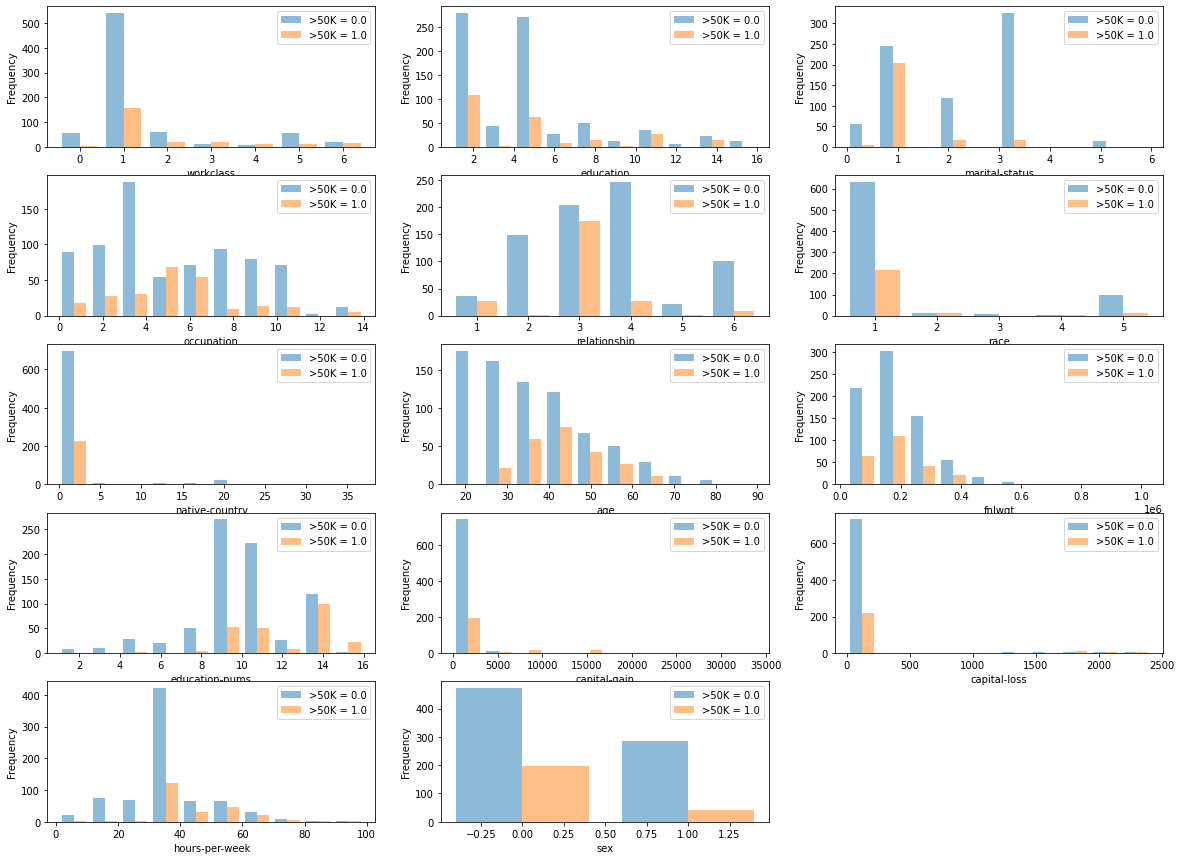

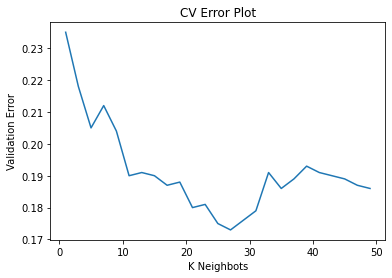

Investigating depths...


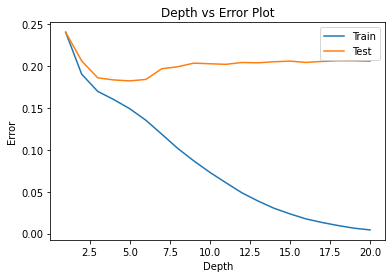

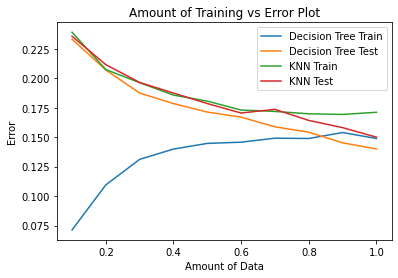

Done


In [ ]:

######################################################################
# main
######################################################################

def main():
  
    # load adult_subsample dataset with correct file path
    ### ========== TODO : START ========== ###
    data_file =  "/content/drive/My Drive/CS M146 Data/adult_subsample.csv"
    ### ========== TODO : END ========== ###
    



    data = load_data(data_file, header=1, predict_col=-1)

    X = data.X; Xnames = data.Xnames
    y = data.y; yname = data.yname
    n,d = X.shape  # n = number of examples, d =  number of features

    

    plt.figure()
    #========================================
    # part a: plot histograms of each feature
    print('Plotting...')
    plot_histograms (X, y, Xnames=Xnames, yname=yname)
    




    ### ========== TODO : START ========== ###
    # part i: Preprocess X (e.g., normalize)
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    ### ========== TODO : END ========== ###




    #========================================
    # train Majority Vote classifier on data
    print('Classifying using Majority Vote...')
    clf = MajorityVoteClassifier() # create MajorityVote classifier, which includes all model parameters
    clf.fit(X, y)                  # fit training data using the classifier
    y_pred = clf.predict(X)        # take the classifier and run it on the training data
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print('\t-- training error: %.3f' % train_error)





    ### ========== TODO : START ========== ###
    # part b: evaluate training error of Random classifier
    print('Classifying using Random...')
    clf = RandomClassifier()
    clf.fit(X, y)
    yr_pred = clf.predict(X)
    terr = 1 - metrics.accuracy_score(y, yr_pred, normalize=True)
    print('\t-- training error: %.3f' % terr)
    ### ========== TODO : END ========== ###





    ### ========== TODO : START ========== ###
    # part c: evaluate training error of Decision Tree classifier
    print('Classifying using Decision Tree...')
    clf = DecisionTreeClassifier(criterion="entropy")
    clf.fit(X,y)
    yd_pred = clf.predict(X)
    terd = 1- metrics.accuracy_score(y, yd_pred, normalize=True)
    print('\t-- training error: %.3f' % terd)
    ### ========== TODO : END ========== ###






    ### ========== TODO : START ========== ###
    # part d: evaluate training error of k-Nearest Neighbors classifier
    # use k = 3, 5, 7 for n_neighbors
    print('Classifying using k-Nearest Neighbors...')
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X,y)
    yk3_pred = clf.predict(X)
    terk3 = 1- metrics.accuracy_score(y, yk3_pred, normalize=True)
    print('\t-- training error k = 3: %.3f' % terk3)
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X,y)
    yk5_pred = clf.predict(X)
    terk5 = 1- metrics.accuracy_score(y, yk5_pred, normalize=True)
    print('\t-- training error k = 5: %.3f' % terk5)
    clf = KNeighborsClassifier(n_neighbors=7)
    clf.fit(X,y)
    yk7_pred = clf.predict(X)
    terk7 = 1- metrics.accuracy_score(y, yk7_pred, normalize=True)
    print('\t-- training error k = 7: %.3f' % terk7)
    ### ========== TODO : END ========== ###





    ### ========== TODO : START ========== ###
    # part e: use cross-validation to compute average training and test error of classifiers
    print('Investigating various classifiers...')
    clf = MajorityVoteClassifier()
    train_e, test_e, f1_score = error(clf, X, y, ntrials=100, test_size=0.2)
    print('\t-- Majority: train_e %.3f, test_e %.3f, f1_score: %.3f' % (train_e, test_e, f1_score))
    clf = RandomClassifier()
    train_e, test_e, f1_score = error(clf, X, y, ntrials=100, test_size=0.2)
    print('\t-- Random: train_e %.3f, test_e %.3f, f1_score: %.3f' % (train_e, test_e, f1_score))
    clf = DecisionTreeClassifier(criterion="entropy")
    train_e, test_e, f1_score = error(clf, X, y, ntrials=100, test_size=0.2)
    print('\t-- Decision tree: train_e %.3f, test_e %.3f, f1_score: %.3f' % (train_e, test_e, f1_score))
    clf = KNeighborsClassifier(n_neighbors=5)
    train_e, test_e, f1_score = error(clf, X, y, ntrials=100, test_size=0.2)
    print('\t-- KNN: train_e %.3f, test_e %.3f, f1_score: %.3f' % (train_e, test_e, f1_score))
    ### ========== TODO : END ========== ###





    ### ========== TODO : START ========== ###
    # part f: use 10-fold cross-validation to find the best value of k for k-Nearest Neighbors classifier
    print('Finding the best k...')
    cvScore = []
    indexi = []
    for i in range (1,50,2):
      clf = KNeighborsClassifier(n_neighbors=i)
      score = cross_val_score(clf,X,y,cv=10)
      cvScore.append(1-score.mean())
      indexi.append(i)
    plt.figure()
    plt.plot(indexi, cvScore)
    plt.xlabel('K Neighbots')
    plt.ylabel('Validation Error')
    plt.title('CV Error Plot')
    plt.show()
    ### ========== TODO : END ========== ###





    ### ========== TODO : START ========== ###
    # part g: investigate decision tree classifier with various depths
    print('Investigating depths...')
    train_e = []
    test_e = []
    depth = []
    for i in range(1,21,1):
      clf = DecisionTreeClassifier(criterion="entropy", max_depth=i)
      train_error, test_error, f1 = error(clf, X, y, ntrials=100, test_size=0.2)
      train_e.append(train_error)
      test_e.append(test_error)
      depth.append(i)
    plt.figure()
    plt.plot(depth , train_e)
    plt.plot(depth , test_e)
    plt.xlabel('Depth')
    plt.ylabel('Error')
    plt.title('Depth vs Error Plot')
    plt.legend(['Train', 'Test']) 
    plt.show()

    ### ========== TODO : END ========== ###





    ### ========== TODO : START ========== ###
    # part h: investigate decision tree and k-Nearest Neighbors classifier with various training set sizes
    SP = StratifiedShuffleSplit(n_splits = 1, test_size = 0.1, random_state= 0)
    TreeTrainA = []
    TreeTestA = []
    KTrainA = []
    KTestA = []
    AmountData = []
    X_train = X_test = []
    y_train = y_test = []
    for train_index, test_index in SP.split(X, y):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
    for i in range(10):
      DTRE = 0
      DTEE = 0
      KTRE = 0
      KTEE = 0
      SP2 = StratifiedShuffleSplit(n_splits = 100, test_size = (i+1)*0.1, random_state= 0)
      X_train2 = X_test2 = []
      y_train2 = y_test2 = []
      if i != 9:
        for train_index, test_index in SP2.split(X_train, y_train):
          X_train2 = X_train[test_index]
          y_train2 = y_train[test_index]
          clf = DecisionTreeClassifier(criterion="entropy", max_depth= 5)
          clf.fit(X_train2, y_train2)
          y_pred = clf.predict(X_train2)
          DTreeTrainE = 1 - metrics.accuracy_score(y_train2, y_pred, normalize=True)
          y_pred = clf.predict(X_test)
          DTreeTestE = 1 - metrics.accuracy_score(y_test, y_pred, normalize=True)
          DTRE += DTreeTrainE
          DTEE += DTreeTestE
          clf = KNeighborsClassifier(n_neighbors=27)
          clf.fit(X_train2, y_train2)
          y_pred = clf.predict(X_train2)
          KTrainE = 1 - metrics.accuracy_score(y_train2, y_pred, normalize=True)
          y_pred = clf.predict(X_test)
          KTestE = 1 - metrics.accuracy_score(y_test, y_pred, normalize=True)
          KTRE += KTrainE
          KTEE += KTestE
      else:
        X_train2 = X_train
        y_train2 = y_train
        clf = DecisionTreeClassifier(criterion="entropy", max_depth= 5)
        clf.fit(X_train2, y_train2)
        y_pred = clf.predict(X_train2)
        DTreeTrainE = 1 - metrics.accuracy_score(y_train2, y_pred, normalize=True)
        y_pred = clf.predict(X_test)
        DTreeTestE = 1 - metrics.accuracy_score(y_test, y_pred, normalize=True)
        DTRE += DTreeTrainE
        DTEE += DTreeTestE
        clf = KNeighborsClassifier(n_neighbors=27)
        clf.fit(X_train2, y_train2)
        y_pred = clf.predict(X_train2)
        KTrainE = 1 - metrics.accuracy_score(y_train2, y_pred, normalize=True)
        y_pred = clf.predict(X_test)
        KTestE = 1 - metrics.accuracy_score(y_test, y_pred, normalize=True)
        KTRE += KTrainE
        KTEE += KTestE
      denom = 0
      if i != 9:
        denom = 100
      else:
        denom = 1
      TreeTrainA.append(DTRE/denom)
      TreeTestA.append(DTEE/denom)
      KTrainA.append(KTRE/denom)
      KTestA.append(KTEE/denom)
      AmountData.append((i+1)*0.1)
     
    plt.figure()
    plt.plot(AmountData , TreeTrainA)
    plt.plot(AmountData, TreeTestA)
    plt.plot(AmountData , KTrainA)
    plt.plot(AmountData , KTestA)
    plt.xlabel('Amount of Data')
    plt.ylabel('Error')
    plt.title('Amount of Training vs Error Plot')
    plt.legend(['Decision Tree Train', 'Decision Tree Test', 'KNN Train', 'KNN Test']) 
    plt.show()
    ### ========== TODO : END ========== ###



    print('Done')


if __name__ == "__main__":
  main()
